# A. Data Wrangling 

## Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Load data

In [2]:
data = pd.read_csv("../data/raw/bank-additional-full.csv", sep = ';')

In [3]:
bank = data.copy()

## Inspect data

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#Rename columns
bank.rename(columns = {'contact': 'contactType', 'day_of_week': 'dayOfWeek','pdays': 'daysLastContacted', \
                       'previous': 'previousCampaignContacts', 'campaign':'currentCampaignContacts',
                      'poutcome': 'lastCampaignOutcome', 'emp.var.rate': 'employmentRate', 'cons.price.idx': 'cpi', \
                      'cons.conf.idx': 'cci', 'nr.employed': 'noEmployed', 'y': 'response'}, inplace = True)

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       41188 non-null  int64  
 1   job                       41188 non-null  object 
 2   marital                   41188 non-null  object 
 3   education                 41188 non-null  object 
 4   default                   41188 non-null  object 
 5   housing                   41188 non-null  object 
 6   loan                      41188 non-null  object 
 7   contactType               41188 non-null  object 
 8   month                     41188 non-null  object 
 9   dayOfWeek                 41188 non-null  object 
 10  duration                  41188 non-null  int64  
 11  currentCampaignContacts   41188 non-null  int64  
 12  daysLastContacted         41188 non-null  int64  
 13  previousCampaignContacts  41188 non-null  int64  
 14  lastCa

In [8]:
bank.month.head()

0    may
1    may
2    may
3    may
4    may
Name: month, dtype: object

## Checking for Duplicates

In [9]:
bank[bank.duplicated(keep = False)]

,age,job,marital,education,default,housing,loan,contactType,month,dayOfWeek,...,currentCampaignContacts,daysLastContacted,previousCampaignContacts,lastCampaignOutcome,employmentRate,cpi,cci,euribor3m,noEmployed,response
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


There is no way to tell if duplicated clients are the same or different peope. We will keep the information as-s

## Reviewing categorical features

In [10]:
categorical_features = bank.select_dtypes('object').columns
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contactType', 'month', 'dayOfWeek', 'lastCampaignOutcome', 'response'],
      dtype='object')

### Job

In [11]:
#Number of unique categories
bank.job.nunique()

12

In [12]:
#Count of categories
bank.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

### Marital Status

In [13]:
#Number of unique categories
bank.marital.nunique()

4

In [14]:
#Count of categories
bank.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

### Education

In [15]:
#Number of unique categories
bank.education.nunique()

8

In [16]:
#Count of categories
bank.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [17]:
#Replace '.' with '_'
bank.education = bank.education.str.replace('.', '_', regex = False)
bank.education.value_counts()

university_degree      12168
high_school             9515
basic_9y                6045
professional_course     5243
basic_4y                4176
basic_6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

### Default

In [18]:
#Check count of categories
bank.default.nunique()

3

In [19]:
#Check count of each category
bank.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

### housing

In [20]:
#Check count of categories
bank.housing.nunique()

3

In [21]:
#Check count of each category
bank.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [22]:
#Check count of categories
bank.loan.nunique()

3

In [23]:
#Check count of each category
bank.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

### contactType

In [24]:
#Check count of categories
bank.contactType.nunique()

2

In [25]:
#Check count of each category
bank.contactType.value_counts()

cellular     26144
telephone    15044
Name: contactType, dtype: int64

### month

In [26]:
#Check count of categories
bank.month.nunique()

10

In [27]:
#Check count of each category
bank.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

### dayOfWeek

In [28]:
#Check count of categories
bank.dayOfWeek.nunique()

5

In [29]:
#Check count of each category
bank.dayOfWeek.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: dayOfWeek, dtype: int64

### lastCampaignOutcome

In [30]:
#Check count of categories
bank.lastCampaignOutcome.nunique()

3

In [31]:
#Check count of each category
bank.lastCampaignOutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: lastCampaignOutcome, dtype: int64

### response

In [32]:
#Check count of categories
bank.response.nunique()

2

In [33]:
#Check count of each category
bank.response.value_counts()

no     36548
yes     4640
Name: response, dtype: int64

## Numerical Features

In [34]:
numerical_features = bank.select_dtypes(['int64', 'float64']).columns
numerical_features

Index(['age', 'duration', 'currentCampaignContacts', 'daysLastContacted',
       'previousCampaignContacts', 'employmentRate', 'cpi', 'cci', 'euribor3m',
       'noEmployed'],
      dtype='object')

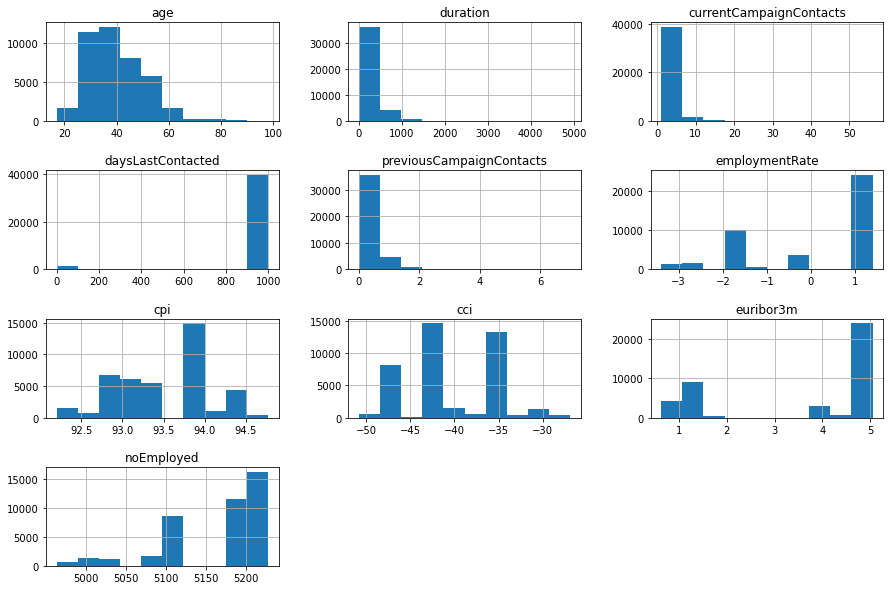

In [35]:
#Plot histograms of numeric features
bank[numerical_features].hist(figsize = (15, 10))
plt.subplots_adjust(hspace= 0.5);

In [36]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
currentCampaignContacts,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
daysLastContacted,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previousCampaignContacts,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
employmentRate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cpi,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cci,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
noEmployed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Most of the values are within a reasonable range. daysLastContacted is the only feature that has a large and suspect value (999). Data owner noted that this value is a default value imputed for those who have not been contacted before. 

# Saving New Dataframe

In [37]:
datapath = '..\data\processed'
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [38]:
datapath_bank = os.path.join(datapath, 'bank_cleaned.csv')
if not os.path.exists(datapath_bank):
    bank.to_csv(datapath_bank, index=False)